# Projet de Speed Dating

## Description du projet:
J'ai analysé les paramètres qui influent sur l'obtention d'un second rendez-vous (match) lors d'un projet de Speed-Dating sur un pannel de plus de 500 personnes. 

A l'issu d'une rencontre entre 2 personnes de sexe différent, chaque participant note des informations par rapport à son/sa partenaire,etc...
Au total, nous avons accès aux données de 8277 rendez-vous.

Ce projet permet de d'observer mes qualités de Data-Analyse et de Data-Visualisation.

## Import des librairies et du dataset "Speed Dating Data"

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [430]:
dataset = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")
#On supprime les personnes de plus de 45ans
dataset = dataset[dataset.age<45]
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Etude de l'importance de l'âge


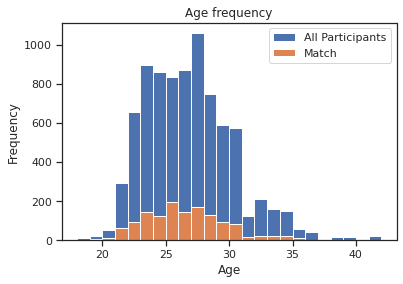

In [431]:
# Age distribution of participants
age = dataset[np.isfinite(dataset['age'])]['age']
age_match = age[dataset.match==1]
plt.hist(age.values, bins=24)
plt.hist(age_match.values, bins=23)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency')
plt.legend(['All Participants','Match'])
plt.show()

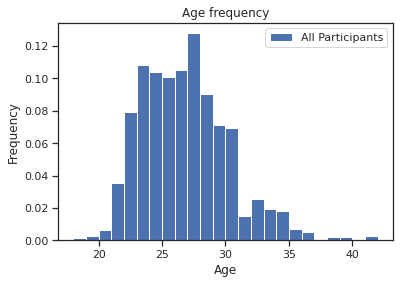

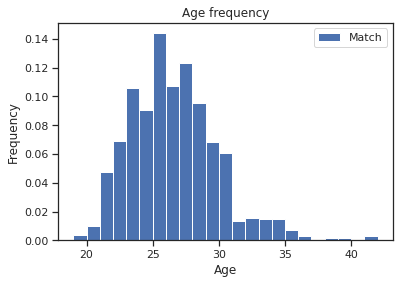

In [432]:
plt.hist(age.values, bins=24, density=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency')
plt.legend(['All Participants'])
plt.show()
plt.hist(age_match.values, bins=23, density=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency')
plt.legend(['Match'])
plt.show()

La distribution des âges est semblable pour la population ayant eu un match et la population totale. Ceci signifie que l'âge n'est pas un frein pour l'obtention d'un match. 

## Importance de la différence d'âge

In [0]:
# Age distribution of participants
match = dataset[dataset.match==1]
match_men = match[match.gender==1]
match_women = match[match.gender==0]
age_diff_men = match_men.age-match_men.age_o
age_diff_women = match_women.age-match_women.age_o

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


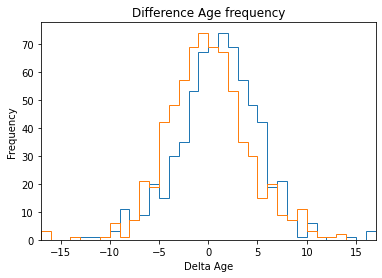

In [340]:
plt.hist(age_diff_men.values, bins=31, histtype='step')
plt.hist(age_diff_women.values, bins=31, histtype='step')
plt.xlabel('Delta Age')
plt.ylabel('Frequency')
plt.title('Difference Age frequency')
plt.xlim(-17,17)
plt.show()

Comme prévu, les hommes comme les femmes ont plus facilement un match avec des personnes qui n'ont pas un âge éloigné. A partir de +/- 6 ans, les chances de match sont beaucoup plus faibles.

## Etude de l'importance de la même origine sur un match

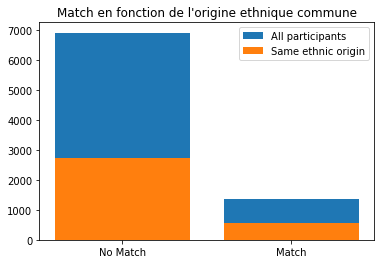

In [341]:
# Influence of same ethnic origine
same_ethnic = dataset.samerace==1
same_ethnic_match = dataset.match[same_ethnic]
all_match = dataset.match
names = ["No Match", "Match"]
plt.title("Match en fonction de l'origine ethnique commune")
plt.bar(names,all_match.value_counts(),)
plt.bar(names,same_ethnic_match.value_counts())
plt.legend(["All participants","Same ethnic origin"])
plt.show()

On en déduit que le pannel n'accorde pas plus facilement de second rendez-vous selon que son partenaire est de la même origine.

##Ce que les H/F recherchent

Afin d'observer les différences entre les hommes et les femmes, nous avons décidé de comparer leurs notes selon 6 critères:

1.   Attraction Physique
2.   Sincérité
3.   Humour
4.   Ambition
5.   Intelligence
6.   Partager des points communs

Nous avons demandé au pannel de donner une note pour chaque critère avec un total de points en répondant à 4 questions:

1.   Que recherchez vous chez le sexe opposé? (100 points total)
2.   Que pensez-vous que le sexe opposé recherche? (100 points total)
3.   Quelle notes vous donneriez-vous? (note sur 10)
4.   Quelle notes pensez-vous que le sexe opposé se donne? (note sur 10)



In [0]:
#Creation de masks H/F
women = dataset[dataset.gender==0].groupby("iid").mean().reset_index()
men = dataset[dataset.gender==1].groupby("iid").mean().reset_index()

#Creation de masks attributs
look_for = ["attr1_1","sinc1_1","fun1_1","amb1_1","intel1_1","shar1_1"]
opp_look_for = ["attr2_1","sinc2_1","fun2_1","amb2_1","intel2_1","shar2_1"]
own_score = ["attr3_1","sinc3_1","fun3_1","amb3_1","intel3_1"]
think_own_score = ["attr5_1","sinc5_1","fun5_1","amb5_1","intel5_1"]

#Preparation des données
men_look_for = men[look_for].mean()
women_look_for = women[look_for].mean()

men_opp_look_for = men[opp_look_for].mean()
women_opp_look_for = women[opp_look_for].mean()

men_own_score = men[own_score].mean()
women_own_score = women[own_score].mean()

men_think_score = men[think_own_score].mean()
women_think_score = women[think_own_score].mean()

In [0]:
from math import pi
def print_radar_chart(df,max,title):
  # ------- PART 1: Create background
  
  # number of variable
  categories=list(df)[1:]
  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
  
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories)
  
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([0,10,20], ["0","10","20"], color="grey", size=7)
  plt.ylim(0,max)
  
  # ------- PART 2: Add plots
  
  # Plot each individual = each line of the data

  # Ind1
  values=df.loc[0].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=df["group"][0])
  ax.fill(angles, values, 'b', alpha=0.2)
  
  # Ind2
  values=df.loc[1].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=df["group"][1])
  ax.fill(angles, values, 'r', alpha=0.2)
  
  # Add legend
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  plt.title(title,pad=20)
  plt.show()

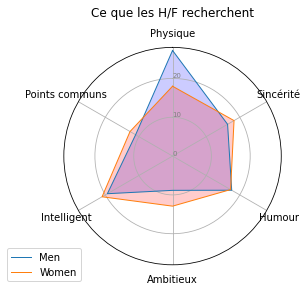

In [344]:
# Set data
df = pd.DataFrame({
'group': ['Men','Women'],
'Physique': [men_look_for[0],women_look_for[0]],   
'Sincérité': [men_look_for[1],women_look_for[1]],
'Humour': [men_look_for[2],women_look_for[2]],
'Ambitieux': [men_look_for[3],women_look_for[3]],
'Intelligent': [men_look_for[4],women_look_for[4]],
'Points communs': [men_look_for[5],women_look_for[5]]
})
print_radar_chart(df,28,"Ce que les H/F recherchent")

On remarque que les hommes accordent une plus grande importance au physique tandis que les femmes accordent un peu plus d'importance à l'ambition de leur partenaire

## Ce que les H/F pensent que les autres recherchent

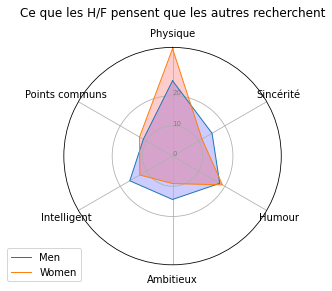

In [345]:
# Set data
df = pd.DataFrame({
'group': ['Men','Women'],
'Physique': [men_opp_look_for[0],women_opp_look_for[0]],   
'Sincérité': [men_opp_look_for[1],women_opp_look_for[1]],
'Humour': [men_opp_look_for[2],women_opp_look_for[2]],
'Ambitieux': [men_opp_look_for[3],women_opp_look_for[3]],
'Intelligent': [men_opp_look_for[4],women_opp_look_for[4]],
'Points communs': [men_opp_look_for[5],women_opp_look_for[5]]
})
print_radar_chart(df,36,"Ce que les H/F pensent que les autres recherchent")

## Ce que les H/F recherchent par rapport à ce que les autres pensent

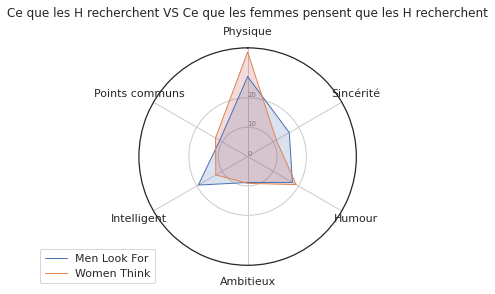

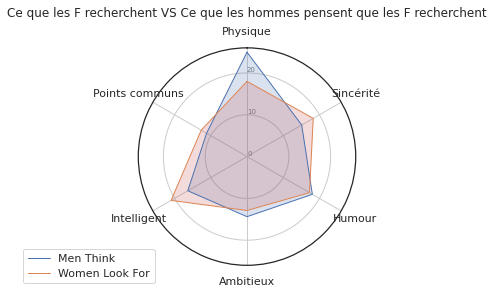

In [433]:
# Set data
df1 = pd.DataFrame({
'group': ['Men Look For','Women Think'],
'Physique': [men_look_for[0],women_opp_look_for[0]],   
'Sincérité': [men_look_for[1],women_opp_look_for[1]],
'Humour': [men_look_for[2],women_opp_look_for[2]],
'Ambitieux': [men_look_for[3],women_opp_look_for[3]],
'Intelligent': [men_look_for[4],women_opp_look_for[4]],
'Points communs': [men_look_for[5],women_opp_look_for[5]]
})

df2 = pd.DataFrame({
'group': ['Men Think','Women Look For'],
'Physique': [men_opp_look_for[0],women_look_for[0]],   
'Sincérité': [men_opp_look_for[1],women_look_for[1]],
'Humour': [men_opp_look_for[2],women_look_for[2]],
'Ambitieux': [men_opp_look_for[3],women_look_for[3]],
'Intelligent': [men_opp_look_for[4],women_look_for[4]],
'Points communs': [men_opp_look_for[5],women_look_for[5]]
})

print_radar_chart(df1,37,"Ce que les H recherchent VS Ce que les femmes pensent que les H recherchent")
print_radar_chart(df2,26,"Ce que les F recherchent VS Ce que les hommes pensent que les F recherchent")

Globalement, en comparant les 2 spider chart, les hommes et les femmes sont 
plutôt doués lorsqu'il s'agit de donner une note à ce que le sexe opposé recherche.
* Cependant, les femmes sous-estiment l'importance que donnent les hommes à propos de la sincérité et de l'intelligence et à l'inverse, elles sur-estiment l'importance du physique.
* Pour ce qui est des hommes, ils sous-estiment l'importance que donnent les femmes à propos de l'intelligence, des points communs et de la sincérité et à l'inverse, ils sur-estiment l'importance du physique. 

On note une tendance des hommes et des femmes à sur-estimer l'importance du physique pour avoir un match quitte à délaisser les qualités d'intelligence et de sincérité.

## Comment les H/F se notent eux-même

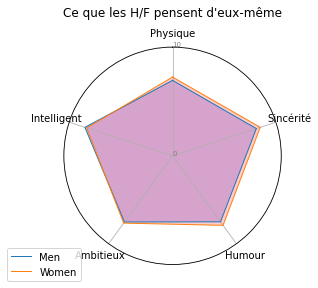

In [348]:
# Set data
df = pd.DataFrame({
'group': ['Men','Women'],
'Physique': [men_own_score[0],women_own_score[0]],   
'Sincérité': [men_own_score[1],women_own_score[1]],
'Humour': [men_own_score[2],women_own_score[2]],
'Ambitieux': [men_own_score[3],women_own_score[3]],
'Intelligent': [men_own_score[4],women_own_score[4]],
})
print_radar_chart(df,10,"Ce que les H/F pensent d'eux-même")

On remarque donc que la moyenne des notes est quasiment la même pour les hommes et pour les femmes.

## Comment les H/F pensent que les autres les perçoivent

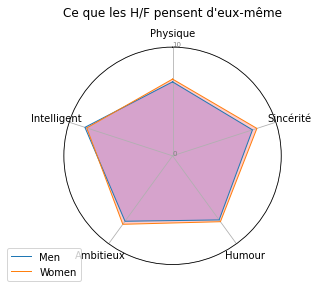

In [350]:
# Set data
df = pd.DataFrame({
'group': ['Men','Women'],
'Physique': [men_think_score[0],women_think_score[0]],   
'Sincérité': [men_think_score[1],women_think_score[1]],
'Humour': [men_think_score[2],women_think_score[2]],
'Ambitieux': [men_think_score[3],women_think_score[3]],
'Intelligent': [men_own_score[4],women_own_score[4]],
})
print_radar_chart(df,10,"Ce que les H/F pensent d'eux-même")

## Corrélation entre les différents hobbies du panel

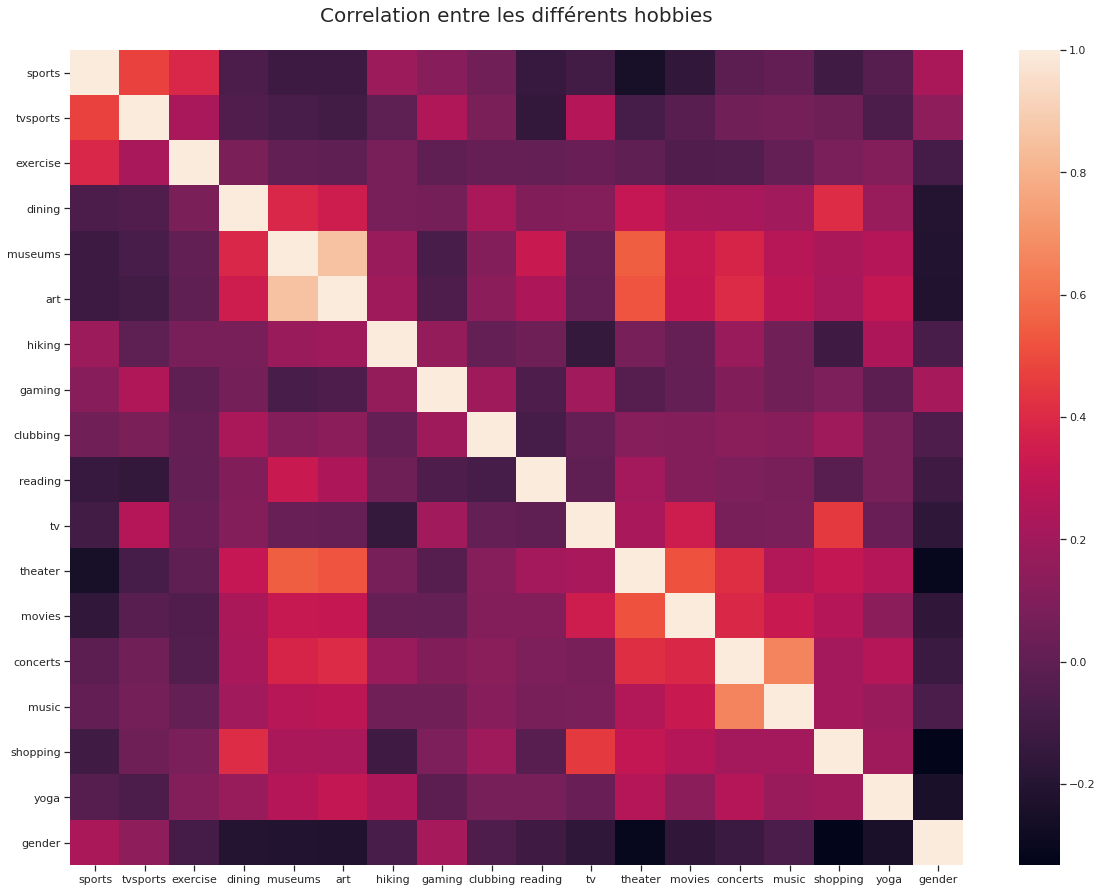

In [357]:
plt.subplots(figsize=(20,15))
interest = ['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','gender']
ax = plt.axes()
ax.set_title("Correlation entre les différents hobbies\n", size=20)
corr = dataset[interest].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Centre d'intérêt des hommes par rapport aux femmes

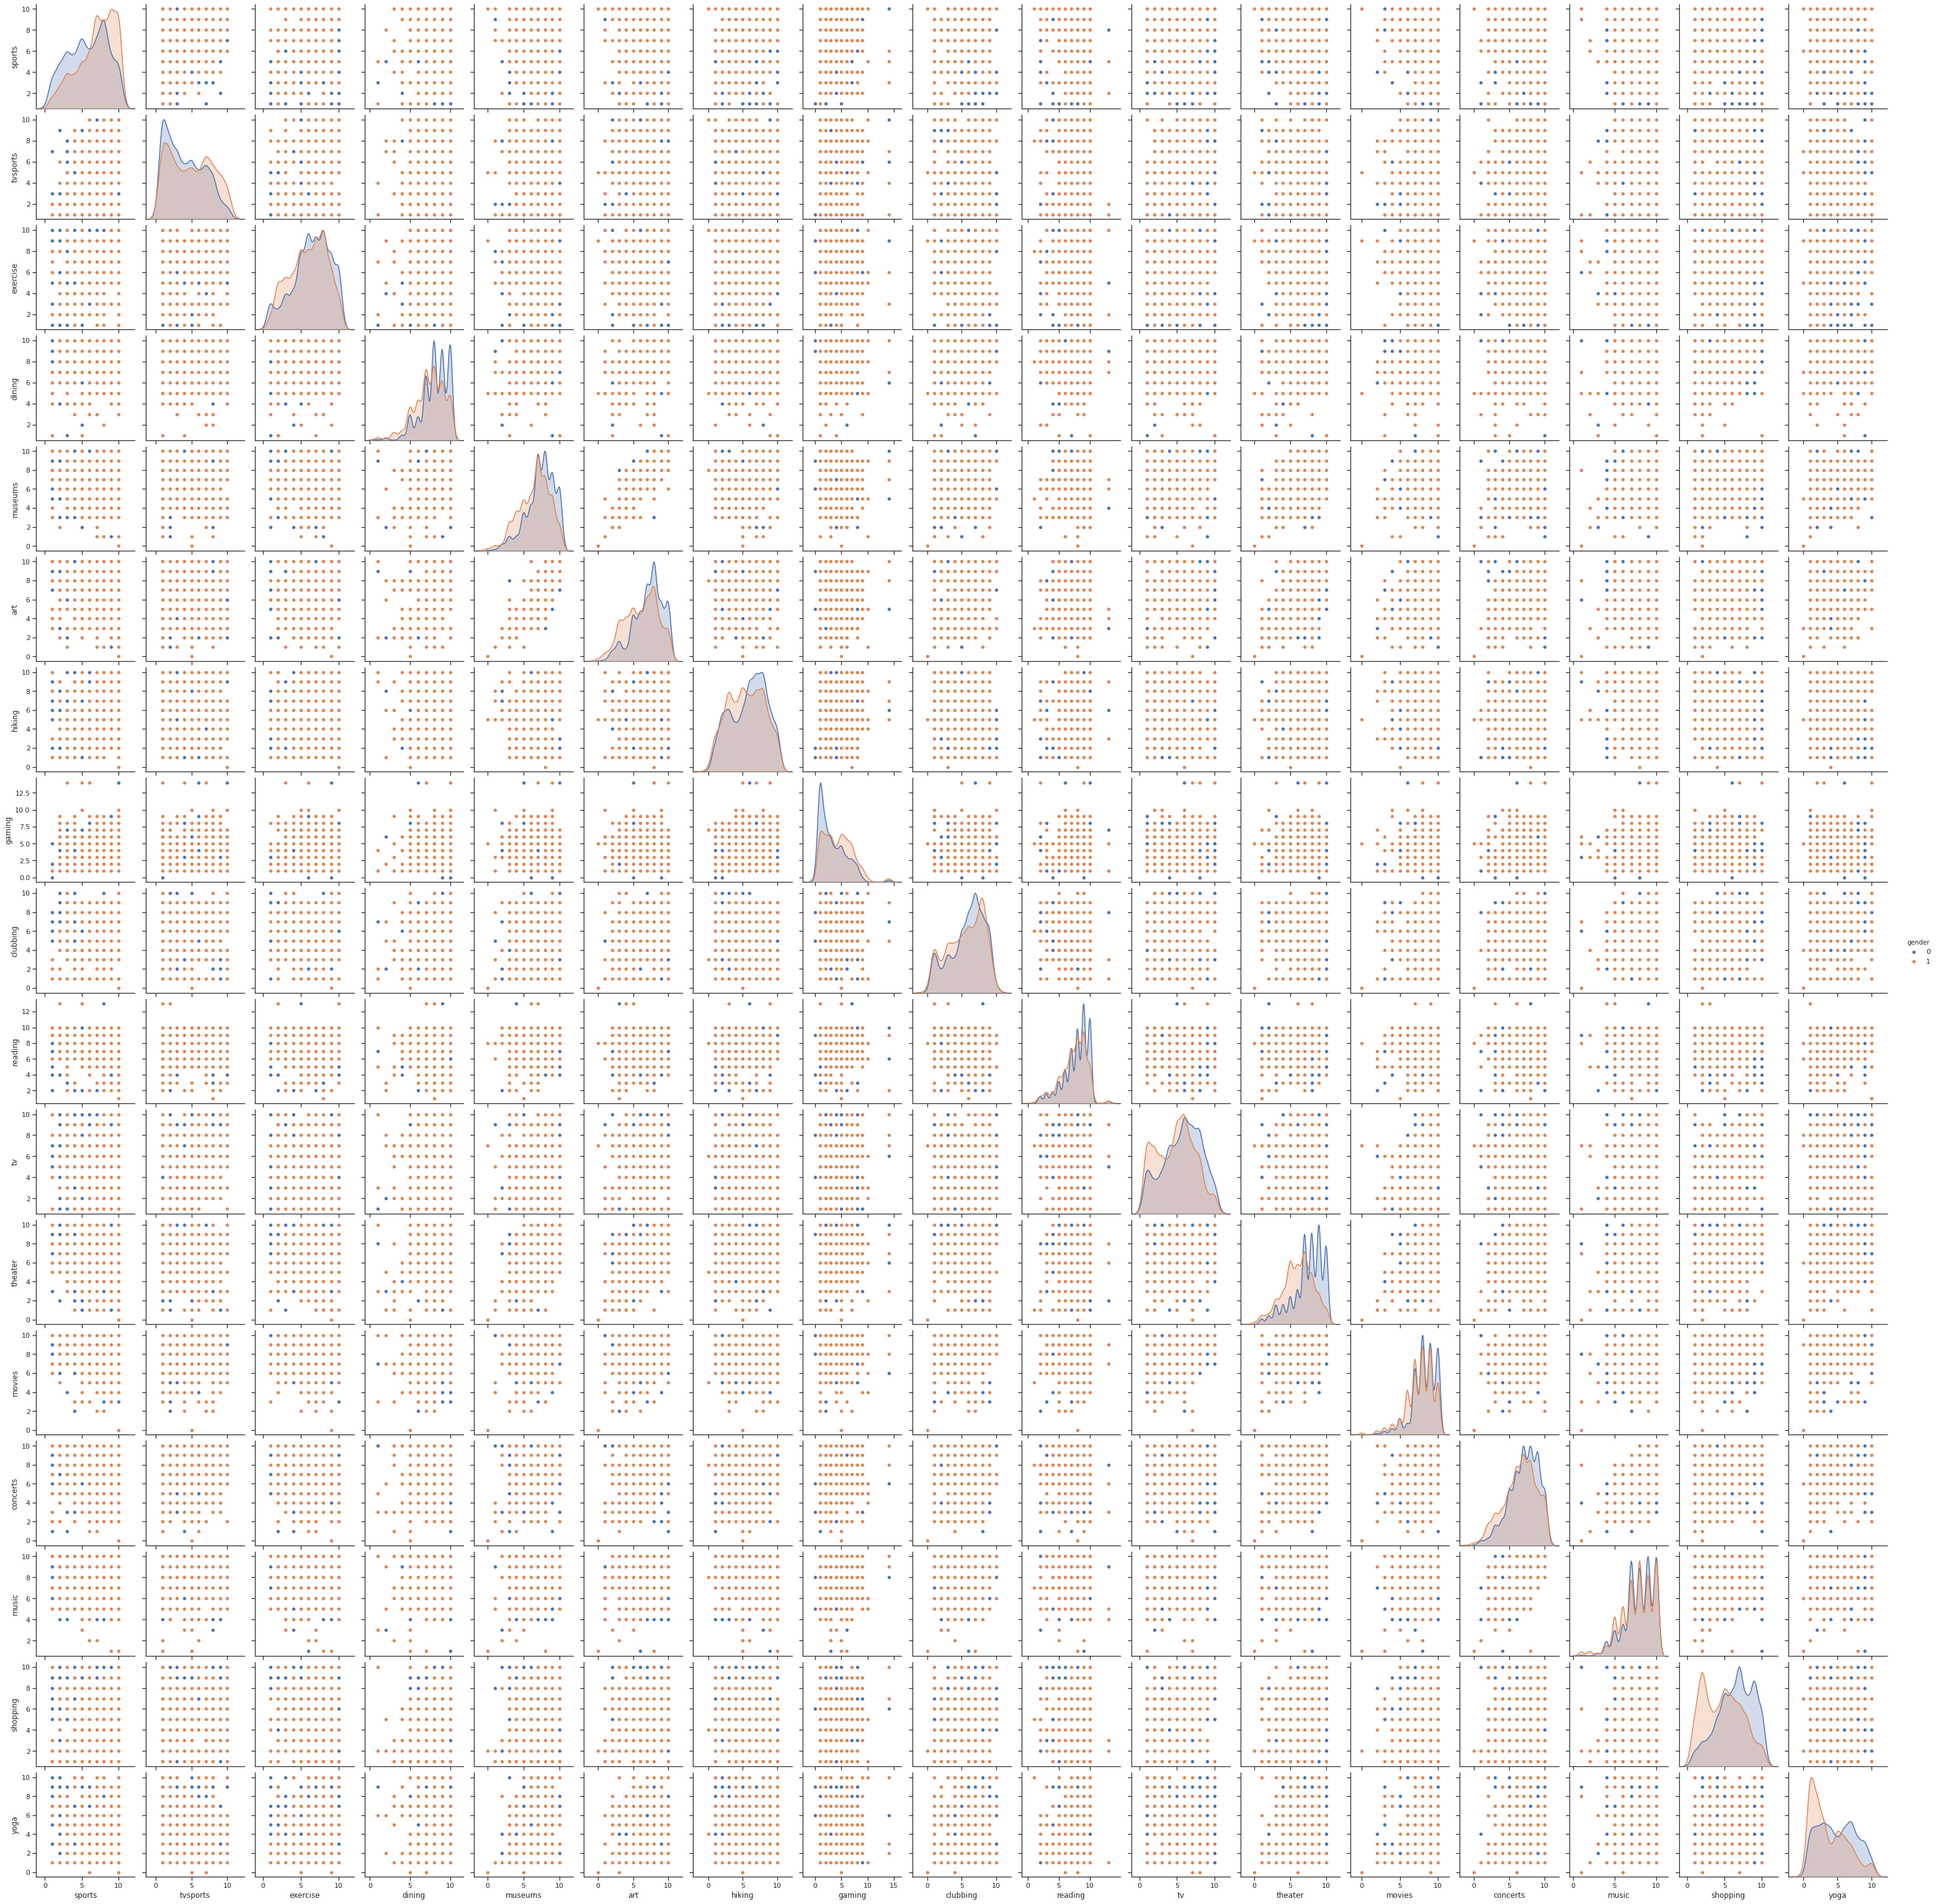

In [356]:
# Interest Overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([dataset.iloc[:, 1],dataset.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(dataset[interest], hue="gender")

Les femmes porte plus d'attention au yoga, au shopping et au théatre que les hommes tandis que les hommes porte plus d'attention au sport que les femmes.

## Quels sont les caractéristiques des personnes qui ont le plus de succès

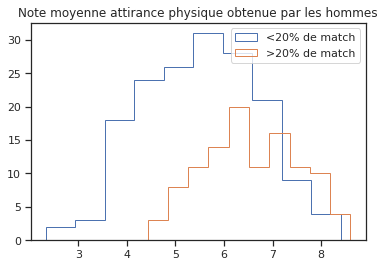

In [438]:
dt = men[men.match<0.2].groupby('iid').mean()
dt1 = men[men.match>=0.20].groupby('iid').mean()
plt.hist(dt.attr_o, bins=10, histtype='step')
plt.hist(dt1.attr_o, bins=10, histtype='step')
plt.title('Note moyenne attirance physique obtenue par les hommes')
plt.legend(['<20% de match','>20% de match'])
plt.show()

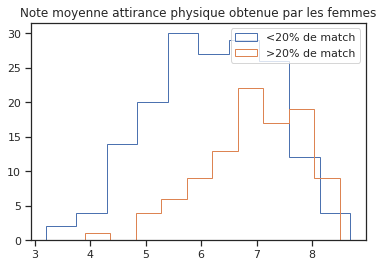

In [436]:
dt = women[women.match<0.20].groupby('iid').mean()
dt1 = women[women.match>=0.20].groupby('iid').mean()
plt.hist(dt.attr_o, bins=10, histtype='step')
plt.hist(dt1.attr_o, bins=10, histtype='step')
plt.title('Note moyenne attirance physique obtenue par les femmes')
plt.legend(['<20% de match','>20% de match'])
plt.show()

Comme on pouvait s'en douter, les hommes et femmes qui ont le plus de succès (>20% de match) sont notés plus beaux/belles que les autres. 


## Note Physique reçue VS Note Physique perçue

In [0]:
df1 = []
df2 = []
for i in range(0,10):
  men_own_score = men[men.attr3_1==i]['attr_o']
  men_score = men[men.attr_o==i]['attr3_1']
  df1.append(men_score.mean())
  df2.append(men_own_score.mean())

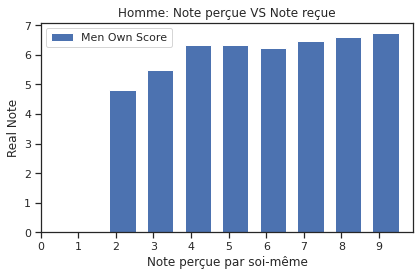

In [530]:
labels=[0,1,2,3,4,5,6,7,8,9]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
#ax.bar(x - width/2, df1, width=0.35, label='Men Score')
ax.bar(x + width/2, df2, width=0.7, label='Men Own Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Real Note")
ax.set_title("Homme: Note perçue VS Note reçue")
ax.set_xlabel("Note perçue par soi-même")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

Les hommes qui se notent moins de 5 ont tendance à se sous-estimer tandis que ceux qui se note plus de 5 ont tendance à se sur-estimer. Globalement, les femmes donnent des notes qui reflète ce que le partenaire pense.

In [0]:
df1 = []
df2 = []
for i in range(0,10):
  women_own_score = women[women.attr3_1==i]['attr_o']
  women_score = women[women.attr_o==i]['attr3_1']
  df1.append(women_score.mean())
  df2.append(women_own_score.mean())

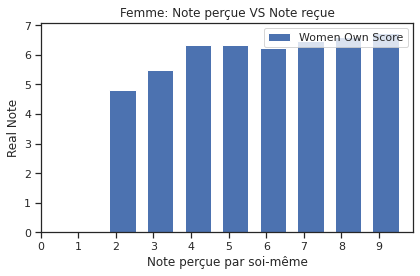

In [529]:
labels=[0,1,2,3,4,5,6,7,8,9]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
#ax.bar(x - width/2, df1, width=0.7, label='Men Score')
ax.bar(x + width/2, df2, width=0.7, label='Women Own Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Real Note")
ax.set_title("Femme: Note perçue VS Note reçue")
ax.set_xlabel("Note perçue par soi-même")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

Les femmes qui se notent moins de 6 se sous-estime tandis que celles qui se notent plus de 6 se sur-estiment. Les hommes donnent des notes globalement meilleures que les femmes cependant, ils ont plus de mal à donner de très bonnes notes (>6).